In [98]:
import scipy.io 
import numpy as np 
import matplotlib.pyplot as plt 

In [99]:
#file_path = r'C:\Users\josep\Desktop\Summer Research Project\white_pixels.mat'
data = scipy.io.loadmat('C:\\Users\josep\Downloads\processedEdges_sp3.mat') 

# Extract the frames 
processed_edges = data['processedEdges'] 

In [100]:
processed_edges[0,0].shape

(360, 1280)

# 1) Image

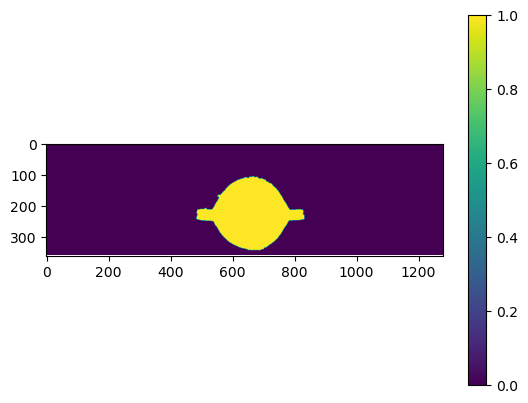

In [105]:
plt.imshow(processed_edges[0, 30], cmap='viridis')  
plt.colorbar()  
plt.show()

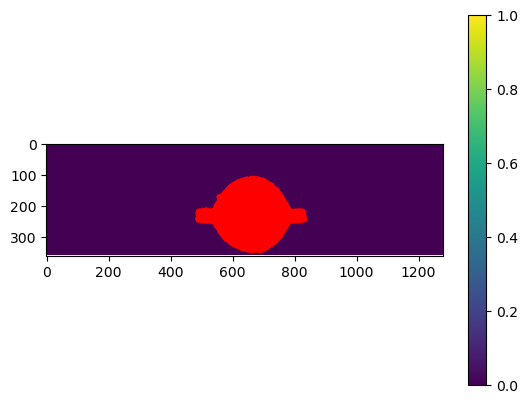

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming processed_edges[0, 30] is a 2D numpy array
# processed_edges = np.random.random((1, 31, 100, 100)) # Example data

# Extract the 2D array
data = processed_edges[0, 30]

# Find indices where values are greater than 0.8
y, x = np.where(data > 0.8)

# Plot the 2D array
plt.imshow(data, cmap='viridis')
plt.colorbar()

# Overlay the points
plt.scatter(x, y, color='red', s=2)

# Show the plot
plt.show()
